#### Loading data from long data format

In [1]:
import pandas as pd

In [2]:
url = (
    "https://gist.githubusercontent.com/rsnirwan/a8b424085c9f44ef2598da74ce43e7a3"
    "/raw/b6fdef21fe1f654787fa0493846c546b7f9c4df2/ts_long.csv"
)
df = pd.read_csv(url, index_col=0, parse_dates=True)
df.head()

,target,item_id
2021-01-01 00:00:00,-1.3378,A
2021-01-01 01:00:00,-1.6111,A
2021-01-01 02:00:00,-1.9259,A
2021-01-01 03:00:00,-1.9184,A
2021-01-01 04:00:00,-1.9168,A


In [6]:
df.shape

(2400, 2)

In [3]:
from gluonts.dataset.pandas import PandasDataset

In [4]:
ds = PandasDataset.from_long_dataframe(df, target="target", item_id="item_id")

In [5]:
ds

PandasDataset<size=10, freq=H, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>

In [7]:
from gluonts.mx import DeepAREstimator, Trainer

estimator = DeepAREstimator(
    freq=ds.freq, prediction_length=24, trainer=Trainer(epochs=1)
)
predictor = estimator.train(ds)
predictions = predictor.predict(ds)

100%|██████████| 50/50 [00:03<00:00, 14.72it/s, epoch=1/1, avg_epoch_loss=0.651]


#### Loading data with missing values

In [40]:
import pandas as pd
import numpy as np

url = (
    "https://gist.githubusercontent.com/rsnirwan/a8b424085c9f44ef2598da74ce43e7a3"
    "/raw/b6fdef21fe1f654787fa0493846c546b7f9c4df2/ts_long.csv"
)
df = pd.read_csv(url, index_col=0, parse_dates=True)
remove_ind = np.random.choice(np.arange(df.shape[0]), size=100, replace=False)
mask = [False if i in remove_ind else True for i in range(df.shape[0])]
df_missing_val = df.loc[mask, :]  # dataframe with 100 rows removed from df

In [42]:
len(df)

2400

In [43]:
len(df_missing_val)

2300

In [41]:
df_missing_val

,target,item_id
2021-01-01 00:00:00,-1.3378,A
2021-01-01 01:00:00,-1.6111,A
2021-01-01 02:00:00,-1.9259,A
2021-01-01 03:00:00,-1.9184,A
2021-01-01 04:00:00,-1.9168,A
...,...,...
2021-01-10 18:00:00,0.8377,J
2021-01-10 20:00:00,1.1525,J
2021-01-10 21:00:00,1.1485,J
2021-01-10 22:00:00,1.3248,J


In [44]:
max_end = max(df.groupby("item_id").apply(lambda _df: _df.index[-1]))

In [45]:
max_end

Timestamp('2021-01-10 23:00:00')

In [10]:
dfs_dict = {}
for item_id, gdf in df_missing_val.groupby("item_id"):
    new_index = pd.date_range(gdf.index[0], end=max_end, freq="1H")
    dfs_dict[item_id] = gdf.reindex(new_index).drop("item_id", axis=1)

ds = PandasDataset(dfs_dict, target="target")

In [39]:
next(iter(ds))

{'start': Period('2021-01-01 00:00', 'H'),
 'target': array([ 0.01319757, -0.44706934, -0.00870165, -0.20113425, -0.31520442,
        -0.07115253, -0.07849238,  0.14524787,  0.22352229,  0.39480437,
         0.51226058,  0.145251  ,  0.24147066,  0.1027267 , -0.09703961,
        -0.30291317, -0.85164453, -1.07405109, -1.34033317, -1.75158365,
        -1.86245997, -2.07169491, -2.27476701, -2.28822964, -2.1752535 ,
        -1.86768254, -1.80978528, -1.32450431, -1.10231172, -0.47112215,
        -0.02871607,  0.48528145,  0.8355133 ,  1.30129467,  1.61948225,
         1.98047662,  1.91600378,  2.11237811,  1.93913804,  2.23718416,
         2.02328845,  1.60884919,  1.31898522,  1.08866958,  0.69462585,
         0.31906504,  0.24532755,  0.21356948, -0.09712526, -0.2586003 ,
        -0.19499721, -0.06593902, -0.04348295, -0.24013354,  0.24961397,
         0.08792683,  0.12511533,  0.39537261,  0.34191513,  0.44017277,
         0.30484319, -0.01831013, -0.34543726, -0.50539733, -0.76109907

#### Loading data from a wide dataframe

In [18]:
url_wide = (
    "https://gist.githubusercontent.com/rsnirwan/c8c8654a98350fadd229b00167174ec4"
    "/raw/a42101c7786d4bc7695228a0f2c8cea41340e18f/ts_wide.csv"
)
df_wide = pd.read_csv(url_wide, index_col=0, parse_dates=True)
print(df_wide.head())

                          A       B       C       D       E       F       G  \
2021-01-01 00:00:00 -1.3378  0.1268 -0.3645 -1.0864 -2.3803 -0.2447  2.2647   
2021-01-01 01:00:00 -1.6111  0.0926 -0.1364 -1.1613 -2.1421 -0.3477  2.4262   
2021-01-01 02:00:00 -1.9259 -0.1420  0.1063 -1.0405 -2.1426 -0.3271  2.4434   
2021-01-01 03:00:00 -1.9184 -0.4930  0.6269 -0.8531 -1.7060 -0.3088  2.4307   
2021-01-01 04:00:00 -1.9168 -0.5057  0.9419 -0.7666 -1.4287 -0.4284  2.3258   

                          H       I       J  
2021-01-01 00:00:00 -0.7917  0.7071  1.3763  
2021-01-01 01:00:00 -0.9609  0.6413  1.2750  
2021-01-01 02:00:00 -0.9034  0.4323  0.6767  
2021-01-01 03:00:00 -0.9602  0.3193  0.5150  
2021-01-01 04:00:00 -1.2504  0.3660  0.1708  


In [19]:
ds = PandasDataset(dict(df_wide))

In [24]:
next(iter(ds))

{'start': Period('2021-01-01 00:00', 'H'),
 'target': array([-1.3378e+00, -1.6111e+00, -1.9259e+00, -1.9184e+00, -1.9168e+00,
        -1.9681e+00, -1.7846e+00, -1.5927e+00, -1.2477e+00, -9.5600e-01,
        -5.3710e-01, -6.3500e-02,  2.4840e-01,  6.2010e-01,  5.0230e-01,
         1.0044e+00,  8.5350e-01,  8.1800e-01,  8.1540e-01,  7.0800e-01,
         6.3530e-01,  2.3250e-01, -4.4800e-02, -2.5390e-01, -5.3010e-01,
        -5.6040e-01, -8.3440e-01, -5.7200e-01, -5.6040e-01, -4.8820e-01,
        -2.4090e-01,  5.6700e-02,  3.9530e-01,  7.2090e-01,  9.3600e-01,
         1.1985e+00,  1.4179e+00,  1.6294e+00,  1.6792e+00,  1.5665e+00,
         1.4542e+00,  1.3784e+00,  1.0784e+00,  7.0940e-01,  3.7570e-01,
         1.0000e-01, -3.8050e-01, -9.3510e-01, -1.2102e+00, -1.5725e+00,
        -1.6813e+00, -1.8947e+00, -2.0547e+00, -1.7722e+00, -1.7434e+00,
        -1.5327e+00, -1.2614e+00, -8.9450e-01, -3.9980e-01, -9.3100e-02,
         1.5230e-01,  6.5690e-01,  7.8350e-01,  1.0239e+00,  9.2650e-01

#### Case study

In [25]:
def generate_single_ts(date_range, item_id=None) -> pd.DataFrame:
    """create sum of `n_f` sin/cos curves with random scale and phase."""
    n_f = 2
    period = np.array([24 / (i + 1) for i in range(n_f)]).reshape(1, n_f)
    scale = np.random.normal(1, 0.3, size=(1, n_f))
    phase = 2 * np.pi * np.random.uniform(size=(1, n_f))
    periodic_f = lambda x: scale * np.sin(np.pi * x / period + phase)

    t = np.arange(0, len(date_range)).reshape(-1, 1)
    target = periodic_f(t).sum(axis=1) + np.random.normal(0, 0.1, size=len(t))
    ts = pd.DataFrame({"target": target}, index=date_range)
    if item_id is not None:
        ts["item_id"] = item_id
    return ts

ts.shape: (240, 1)
                       target
2021-01-01 00:00:00  1.278172
2021-01-01 01:00:00  0.762310
2021-01-01 02:00:00  0.675674
2021-01-01 03:00:00  0.092758
2021-01-01 04:00:00 -0.197934


<Axes: >

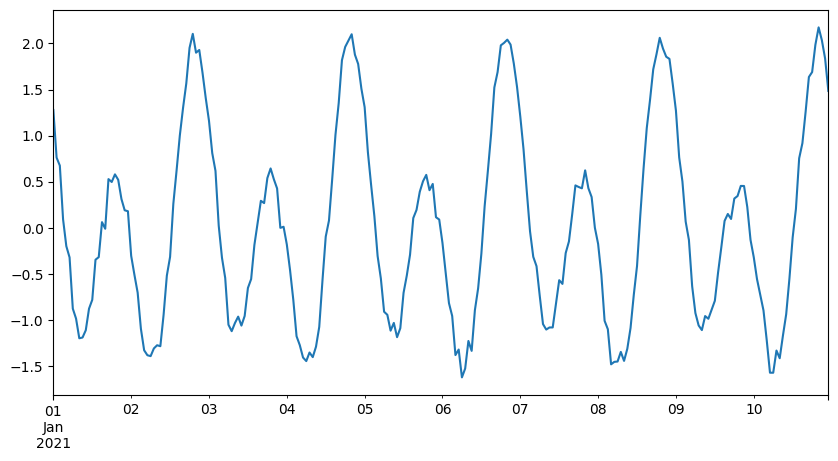

In [26]:
prediction_length, freq = 24, "1H"
T = 10 * prediction_length
date_range = pd.date_range("2021-01-01", periods=T, freq=freq)
ts = generate_single_ts(date_range)

print("ts.shape:", ts.shape)
print(ts.head())
ts.loc[:, "target"].plot(figsize=(10, 5))

In [27]:
from gluonts.mx import DeepAREstimator, Trainer
from gluonts.evaluation import make_evaluation_predictions, Evaluator


def train_and_predict(dataset, estimator):
    predictor = estimator.train(dataset)
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset, predictor=predictor
    )
    evaluator = Evaluator(quantiles=(np.arange(20) / 20.0)[1:])
    agg_metrics, item_metrics = evaluator(ts_it, forecast_it, num_series=len(dataset))
    return agg_metrics["MSE"]


estimator = DeepAREstimator(
    freq=freq, prediction_length=prediction_length, trainer=Trainer(epochs=1)
)

In [28]:
ds = PandasDataset(ts, target="target", freq=freq)
train_and_predict(ds, estimator)

Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


0.04026231383406756

#### Multiple time series

In [36]:
N = 10
multiple_ts = [generate_single_ts(date_range) for i in range(N)]

ds = PandasDataset(multiple_ts, target="target", freq=freq)
train_and_predict(ds, estimator)

Running evaluation: 100%|██████████| 10/10 [00:00<00:00, 16.20it/s]


0.0507827239885144

##### If the data is in long format

In [37]:
ts_in_long_format = pd.concat(
    [generate_single_ts(date_range, item_id=i) for i in range(N)]
)

# Note we need an item_id column now and provide its name to the constructor.
# Otherwise, there is no way to distinguish different time series.
ds = PandasDataset.from_long_dataframe(
    ts_in_long_format, item_id="item_id", target="target", freq=freq
)
train_and_predict(ds, estimator)

Running evaluation: 100%|██████████| 10/10 [00:00<00:00, 17.54it/s]


0.042260637834243386

#### Include static and dynamic features

In [29]:
def generate_single_ts_with_features(date_range, item_id) -> pd.DataFrame:
    ts = generate_single_ts(date_range, item_id)
    T = ts.shape[0]
    # static features are constant for each series
    ts["dynamic_real_1"] = np.random.normal(size=T)
    ts["dynamic_real_2"] = np.random.normal(size=T)
    # ... we can have as many static or dynamic features as we like
    return ts


ts = generate_single_ts_with_features(date_range, item_id=0)
ts.head()

,target,item_id,dynamic_real_1,dynamic_real_2
2021-01-01 00:00:00,-0.096223,0,0.840660,-1.746467
2021-01-01 01:00:00,-0.009629,0,-0.843931,0.691808
2021-01-01 02:00:00,0.252644,0,0.172577,-0.708763
2021-01-01 03:00:00,0.481907,0,-0.467744,0.179864
2021-01-01 04:00:00,0.719753,0,-0.877961,0.435121


In [30]:
estimator_with_features = DeepAREstimator(
    freq=ds.freq,
    prediction_length=prediction_length,
    use_feat_dynamic_real=True,
    use_feat_static_real=True,
    use_feat_static_cat=True,
    cardinality=[
        3,
    ],
    trainer=Trainer(epochs=1),
)

In [49]:
N = 10

multiple_ts = {
    i: generate_single_ts_with_features(date_range, item_id=i) for i in range(N)
}
static_features = pd.DataFrame(
    {
        "color": pd.Categorical(np.random.choice(["red", "green", "blue"], size=N)),
        "height": np.random.normal(loc=100, scale=15, size=N),
    },
    index=list(multiple_ts.keys()),
)
multiple_ts_long = pd.concat(multiple_ts.values())

multiple_ts_dataset = PandasDataset(
    multiple_ts,
    feat_dynamic_real=["dynamic_real_1", "dynamic_real_2"],
    static_features=static_features,
)
# for long-dataset we use a different constructor and need a `item_id` column
multiple_ts_long_dataset = PandasDataset.from_long_dataframe(
    multiple_ts_long,
    item_id="item_id",
    feat_dynamic_real=["dynamic_real_1", "dynamic_real_2"],
    static_features=static_features,
)

In [50]:
train_and_predict(multiple_ts_dataset, estimator_with_features)

  0%|          | 0/50 [00:00<?, ?it/s]

Running evaluation: 100%|██████████| 10/10 [00:00<00:00, 22.18it/s]


0.47118815170323386

#### Use train/test split

In [52]:
type(multiple_ts.items())

dict_items

In [54]:
multiple_ts

{0:                        target  item_id  dynamic_real_1  dynamic_real_2
 2021-01-01 00:00:00 -0.398413        0        0.566860       -0.321943
 2021-01-01 01:00:00 -0.500893        0       -1.035597        0.087413
 2021-01-01 02:00:00 -0.403064        0        0.545287       -0.301794
 2021-01-01 03:00:00 -0.260843        0       -0.850310       -0.571536
 2021-01-01 04:00:00  0.122534        0       -0.254598        0.829014
 ...                       ...      ...             ...             ...
 2021-01-10 19:00:00 -0.349312        0        1.367338       -1.166731
 2021-01-10 20:00:00 -0.440241        0       -0.981674       -0.041918
 2021-01-10 21:00:00 -0.420551        0        0.459643       -1.767719
 2021-01-10 22:00:00 -0.312475        0       -0.159673       -0.684692
 2021-01-10 23:00:00 -0.578216        0       -0.402539       -1.130743
 
 [240 rows x 4 columns],
 1:                        target  item_id  dynamic_real_1  dynamic_real_2
 2021-01-01 00:00:00 -1.559612 

In [53]:
train = PandasDataset(
    {item_id: df[:-prediction_length] for item_id, df in multiple_ts.items()},
    feat_dynamic_real=["dynamic_real_1", "dynamic_real_2"],
    static_features=static_features,
)

test = PandasDataset(
    multiple_ts,
    feat_dynamic_real=["dynamic_real_1", "dynamic_real_2"],
    static_features=static_features,
)

In [35]:
predictor = estimator_with_features.train(train)
forecast_it, ts_it = make_evaluation_predictions(dataset=test, predictor=predictor)
evaluator = Evaluator(quantiles=(np.arange(20) / 20.0)[1:])
agg_metrics, item_metrics = evaluator(ts_it, forecast_it, num_series=len(test))

Running evaluation: 100%|██████████| 10/10 [00:00<00:00, 17.42it/s]
